In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Manasi2001/Fundamentals-of-Machine-Learning/main/Lab-8/Dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


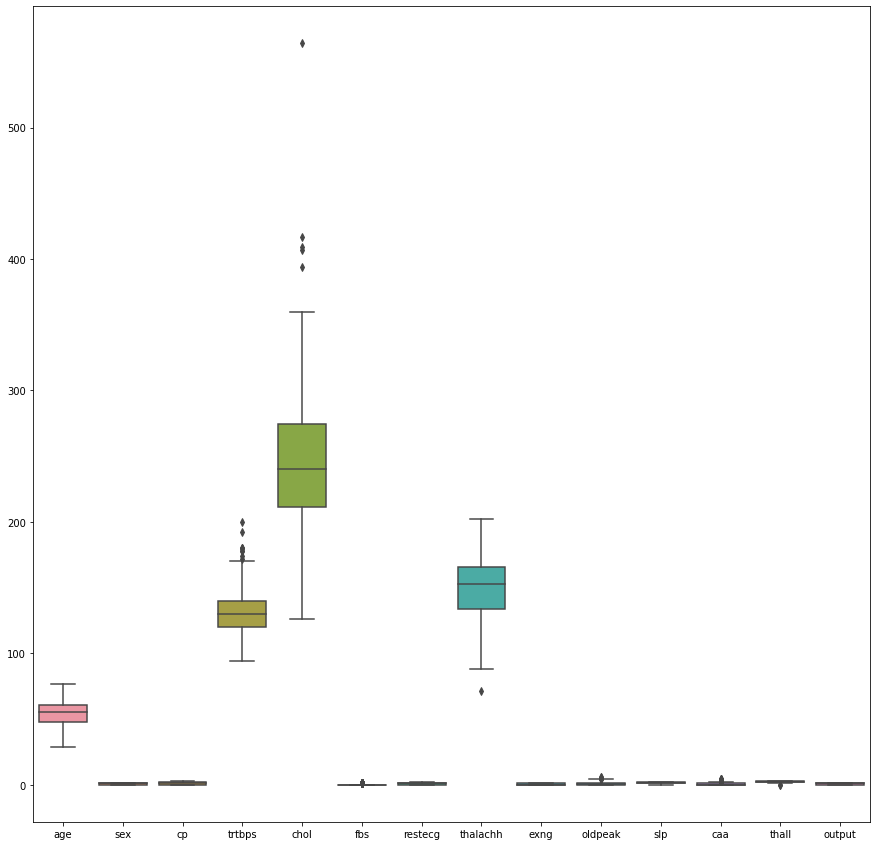

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data)
plt.show()

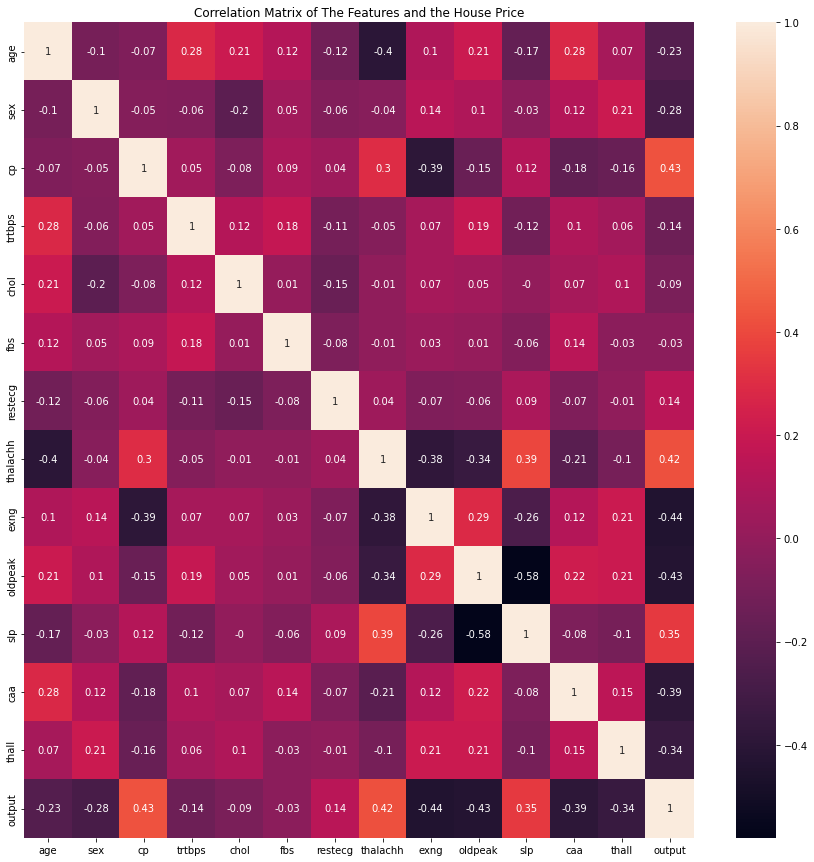

In [ ]:
plt.figure(figsize=(15,15))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True) #cmap='Blues_r'
plt.title('Correlation Matrix of The Features and the House Price')
plt.show()

In [ ]:
x = data.drop('output',axis=1).values
y = data['output'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)
x_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.191874,0.137227,0.397597,0.153942,-0.051653,0.482494,-0.202681,0.003112,-0.140375,0.219105,-0.458342,-0.143962,-0.433011
1,-0.431091,0.153278,0.225656,-0.020873,0.016250,-0.093999,0.202335,0.367655,-0.156795,0.477740,-0.511953,-0.160801,-0.115446
2,-0.479379,-0.477512,0.010416,-0.030157,-0.265605,-0.135810,-0.327085,0.317876,-0.226536,0.101105,0.317498,-0.232324,-0.166796
3,0.075125,0.283949,0.013356,-0.276803,-0.082706,-0.174135,0.374828,0.516983,-0.290465,-0.086187,0.407096,-0.297886,-0.213866
4,0.080094,-0.404908,-0.258790,-0.183058,0.574114,-0.115161,0.247884,0.161018,0.395826,-0.104575,0.269224,-0.197000,-0.141436


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
import torch

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([242, 13])
torch.Size([61, 13])
torch.Size([242])
torch.Size([61])


In [ ]:
print(y_train) # row vector

tensor([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 0])


In [ ]:
#y_train = y_train.unsqueeze(1) # converting from row vector to column vector
#y_train = y_train.float() # value after sigmoid function conmes in float - inorder to do the comapraison and to remove the problem of typecasting use float here insteas of long
#print(y_train)

In [ ]:
type(y_train)

torch.Tensor

In [ ]:
y_train.shape

torch.Size([242])

In [ ]:
# Building the model
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_dataset =  TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

In [ ]:
batch_size = 10
train_dl = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_dl = DataLoader(test_dataset,batch_size=batch_size)

In [ ]:
class ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.stack = nn.Sequential(nn.Linear(13,500),
                               nn.ReLU(),
                               nn.Linear(500,100),
                               nn.ReLU(),
                               nn.Linear(100,2))
  def forward(self,x):
    x = self.stack(x)
    return x

In [ ]:
model = ANN()
model

ANN(
  (stack): Sequential(
    (0): Linear(in_features=13, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
"""
for i in range(epochs):
  #print(type(x_train))
  y_pred = model.forward(x_train) # forward propagation
  y_pred = torch.sigmoid(y_pred) # calculating the output value
  y_pred = torch.round(y_pred) # for classification purpose only
  print(y_train.shape,y_pred.shape)
  loss = criterion(y_pred,y_train) # loss calculation
  loss_arr.append(loss)
  if(i%10==0):
    print(f"After {i+1}th epoch the loss is: {loss}")
  # makes the gradients at each epoch as 0
  optimizer.zero_grad() # needs to done since at every epoach we do not need the previous gradients
  # if not donme will affects your model's effcicency
  loss.backward() # back propagation
  optimizer.step() # weight updation as per gradient descent rule
  """

'\nfor i in range(epochs):\n  #print(type(x_train))\n  y_pred = model.forward(x_train) # forward propagation\n  y_pred = torch.sigmoid(y_pred) # calculating the output value\n  y_pred = torch.round(y_pred) # for classification purpose only\n  print(y_train.shape,y_pred.shape)\n  loss = criterion(y_pred,y_train) # loss calculation\n  loss_arr.append(loss)\n  if(i%10==0):\n    print(f"After {i+1}th epoch the loss is: {loss}")\n  # makes the gradients at each epoch as 0\n  optimizer.zero_grad() # needs to done since at every epoach we do not need the previous gradients\n  # if not donme will affects your model\'s effcicency\n  loss.backward() # back propagation\n  optimizer.step() # weight updation as per gradient descent rule\n  '

In [ ]:
epochs = 300
loss_arr = []
for i in range(epochs):
  model.train()
  epoch_loss = 0.0
  for x,y in train_dl:
    y_pred = model(x)
    #print(y_pred)
    #print(y)
    #print(y_pred.shape,y.shape)
    loss = criterion(y_pred,y)
    epoch_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_arr.append(epoch_loss/len(train_dl))
  if(i%10==0):
    print(f"After {i}th epoch the loss is: {epoch_loss/len(train_dl)}")

After 0th epoch the loss is: 13.690831108540296
After 10th epoch the loss is: 0.6672725665569306
After 20th epoch the loss is: 0.5337147217988968
After 30th epoch the loss is: 0.3875259491801262
After 40th epoch the loss is: 0.40553668677806853
After 50th epoch the loss is: 0.3833059459924698
After 60th epoch the loss is: 0.41374113082885744
After 70th epoch the loss is: 0.45317355066537857
After 80th epoch the loss is: 0.40867324113845827
After 90th epoch the loss is: 0.41996688961982725
After 100th epoch the loss is: 0.38009916961193085
After 110th epoch the loss is: 0.48887649714946746
After 120th epoch the loss is: 0.3553401020169258
After 130th epoch the loss is: 0.3972852450609207
After 140th epoch the loss is: 0.4455860215425491
After 150th epoch the loss is: 0.39070417165756227
After 160th epoch the loss is: 0.4159844526648521
After 170th epoch the loss is: 0.44137436270713803
After 180th epoch the loss is: 0.3951860222220421
After 190th epoch the loss is: 0.4671909987926483
Af

In [ ]:
preds = []
count=0
with torch.no_grad(): # used to prevent the model from going to back propagation
  for x,y in test_dl:
    for i,j in list(zip(x,y)):
      y_pred = model(i)
      preds.append(y_pred.argmax().item())


In [ ]:
preds = np.array(preds)
actual = y_test.numpy()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(actual,preds))

0.7704918032786885


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual,preds))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.68      0.88      0.77        26

    accuracy                           0.77        61
   macro avg       0.78      0.79      0.77        61
weighted avg       0.80      0.77      0.77        61



References:

[1] https://github.com/rahul1-bot/minor_Project/blob/main/kidney_project.py

[2]https://github.com/Manasi2001/Fundamentals-of-Machine-Learning/tree/main/Lab-8

[3]https://web.microsoftstream.com/video/1f76f7da-f3c1-4c4f-ade8-091ccdd28c27?list=user&userId=e6fa3936-b55e-477e-bd69-f4c3dd33e956

In [ ]:
columns = data.columns
def removeOutliers(in_data,col):
  Q1 = in_data[col].quantile(0.25)
  Q3 = in_data[col].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  out_data = in_data.loc[(in_data[col]>lower)&(in_data[col]<upper)]
  return out_data
for col in columns:
  data=removeOutliers(data,col)